In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduates-admission-prediction/admission_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/kaggle/input/graduates-admission-prediction/admission_data.csv')
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [6]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

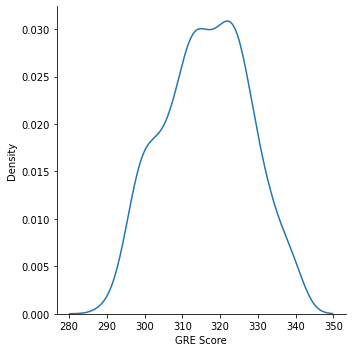

In [7]:
sns.displot(data['GRE Score'],kind='kde')

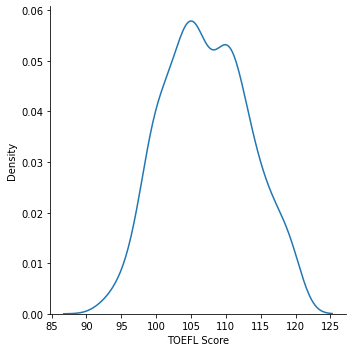

In [8]:
sns.displot(data['TOEFL Score'],kind='kde')

<AxesSubplot:xlabel='University Rating', ylabel='Count'>

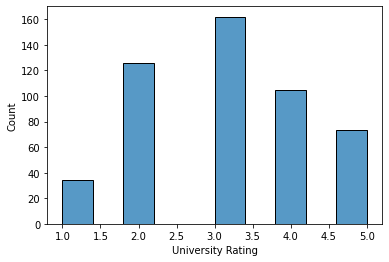

In [9]:
sns.histplot(data['University Rating'])

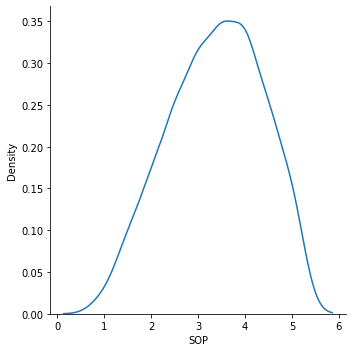

In [10]:
sns.displot(data['SOP'],kind='kde')

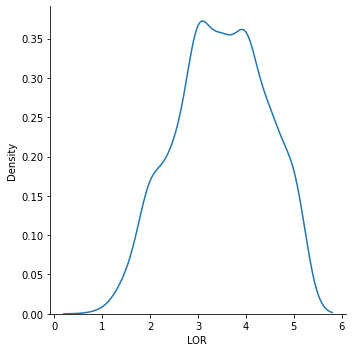

In [11]:
sns.displot(data['LOR '],kind='kde')
#data.columns

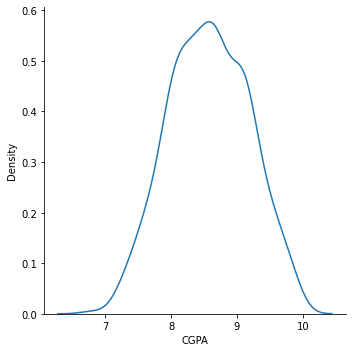

In [12]:
sns.displot(data['CGPA'],kind='kde')

<AxesSubplot:xlabel='Research', ylabel='Count'>

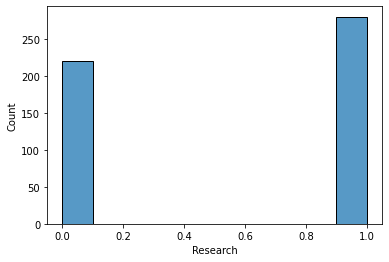

In [13]:
sns.histplot(data['Research'])

In [14]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

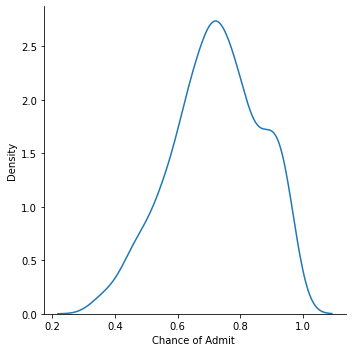

In [15]:
sns.displot(data['Chance of Admit '],kind='kde')

In [16]:
corr=data.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


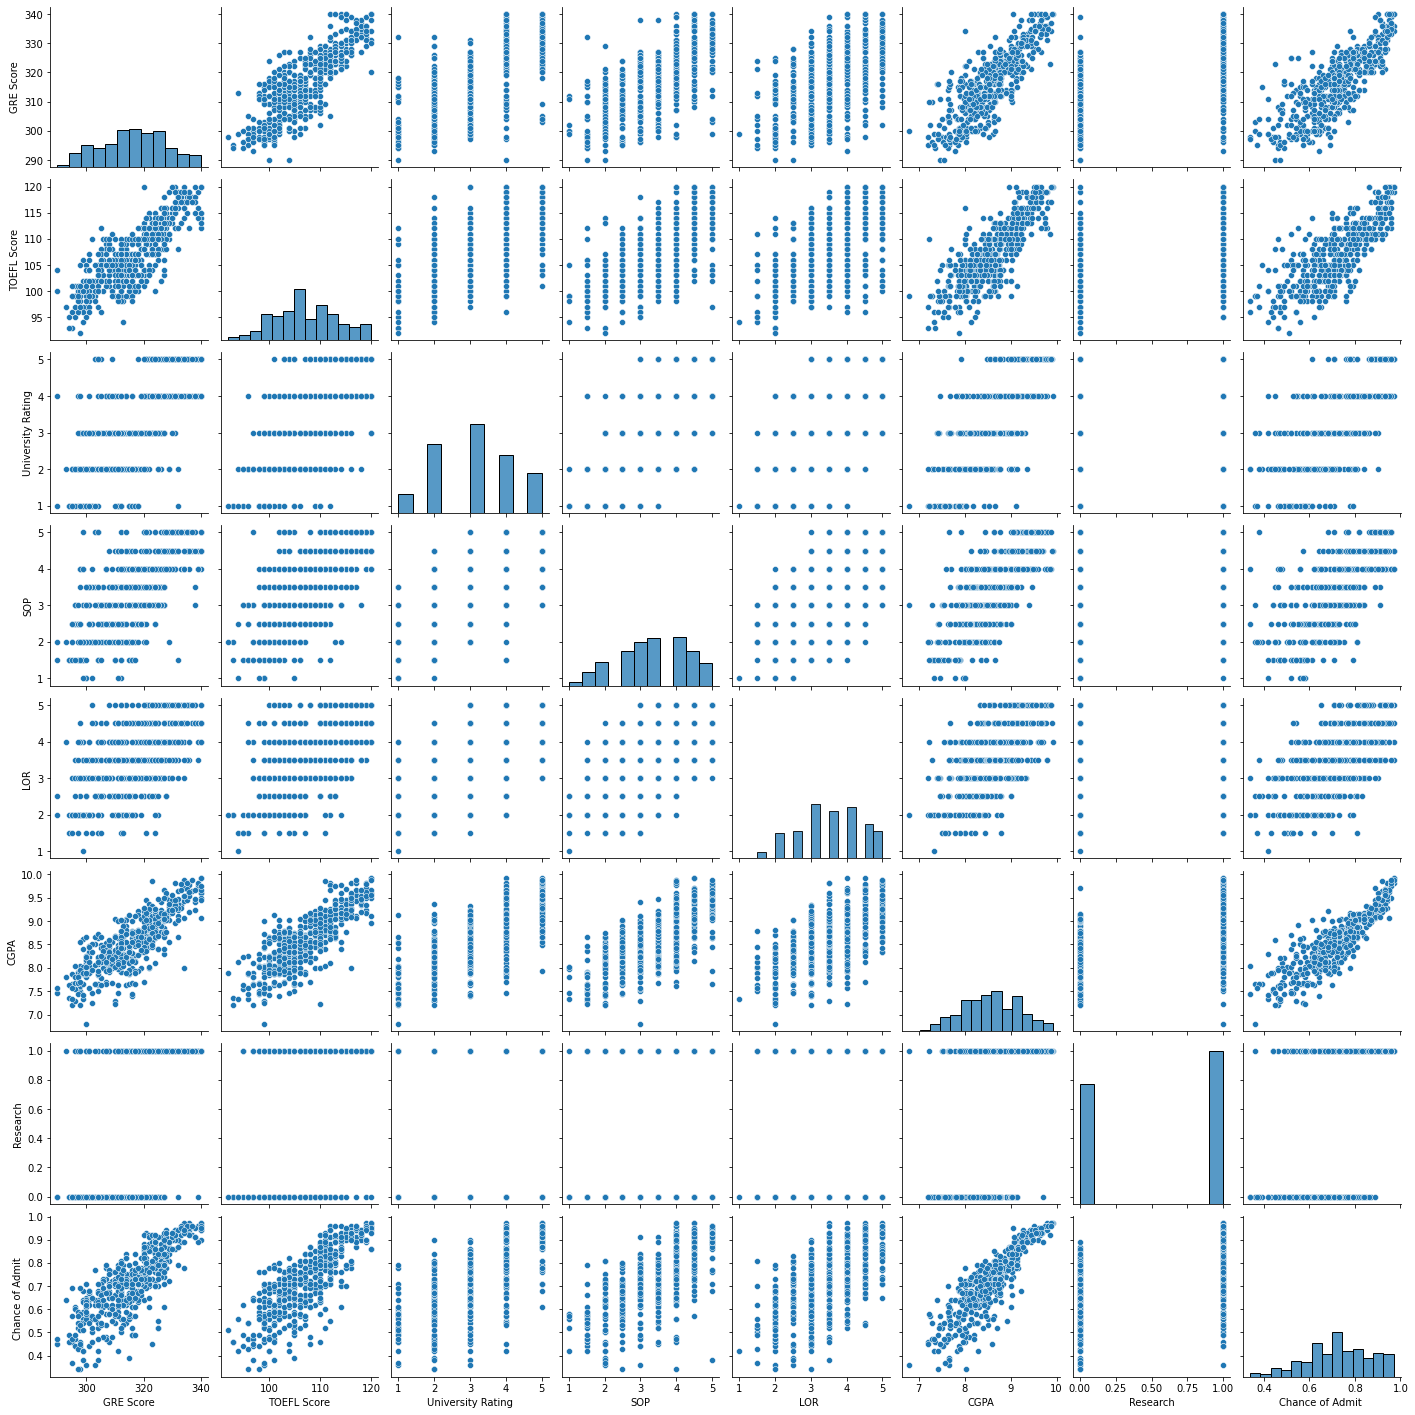

In [17]:
sns.pairplot(data)

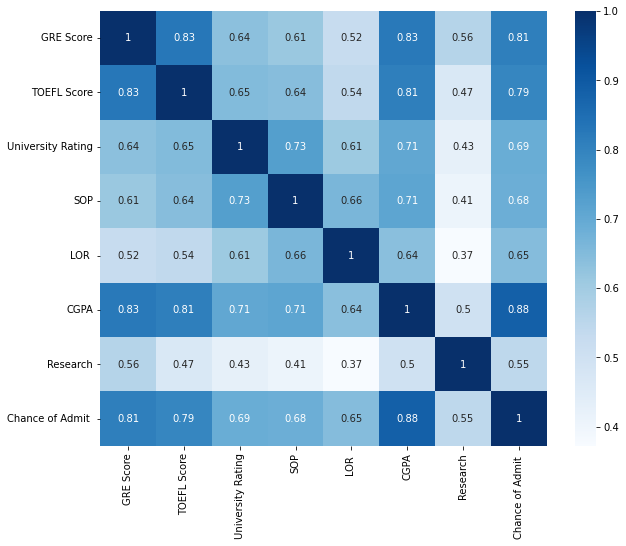

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

In [19]:
X=data.drop('Chance of Admit ',axis=1)
Y=data['Chance of Admit ']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(X_train,y_train)


LinearRegression()

In [26]:
lr_predict=lr.predict(X_test)

In [27]:
train_error_lr=lr.score(X_train,y_train)
test_error_lr=lr.score(X_test,y_test)
print("Training Error is",train_error_lr)
print("Test Error is",test_error_lr)

Training Error is 0.8210671369321553
Test Error is 0.8188432567829631


# Train and Test Accuracy is 82% and 81% approximately. We can tray other models as well

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [29]:
DTR_model=DecisionTreeRegressor()

In [30]:
DTR_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [31]:
DTR_predict=DTR_model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [33]:
DTR_MSE=mean_squared_error(DTR_predict,y_test)
DTR_MAE=mean_absolute_error(DTR_predict,y_test)
DTR_r2=r2_score(DTR_predict,y_test)

In [34]:
print("Mean squared error is",DTR_MSE)
print("Mean Absolute error is",DTR_MAE)
print("R2 score is",DTR_r2)

Mean squared error is 0.009404
Mean Absolute error is 0.0682
R2 score is 0.590828003306792


In [35]:
train_error=DTR_model.score(X_train,y_train)
testing_error=DTR_model.score(X_test,y_test)
print("Training error",train_error)
print("Test error",testing_error)

Training error 1.0
Test error 0.5401466992665038


In [36]:
#model is overfitting

In [37]:
RF_model=RandomForestRegressor()

In [38]:
RF_model.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
RF_predict=RF_model.predict(X_test)

In [40]:
MSE_RF=mean_squared_error(RF_predict,y_test)
MAE_RF=mean_absolute_error(RF_predict,y_test)
r2_RF=r2_score(RF_predict,y_test)

In [41]:
print("Mean Squared error",MSE_RF)
print("Mean Absolute error",MSE_RF)
print("R2_score",r2_RF)

Mean Squared error 0.004348643699999998
Mean Absolute error 0.004348643699999998
R2_score 0.7578659438686303


In [42]:
Train_error=RF_model.score(X_train,y_train)
test_error=RF_model.score(X_test,y_test)

In [43]:
print("Training error",Train_error)
print("Test error",test_error)

Training error 0.9715425800334121
Test error 0.7873523863080686


In [44]:
# model is Over fitting

In [45]:
from xgboost import XGBRegressor

In [46]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_predict=xgb.predict(X_test)

In [47]:
MSE_XGB=mean_squared_error(xgb_predict,y_test)
MAE_XGB=mean_absolute_error(xgb_predict,y_test)
r2_xgb=r2_score(xgb_predict,y_test)

In [48]:
print("Mean Squared Error",MSE_XGB)
print("Mean Absolute Error",MAE_XGB)
print("R2 score",r2_xgb)

Mean Squared Error 0.004952965819404751
Mean Absolute Error 0.04928480867147446
R2 score 0.7428929338095949


In [49]:
train_error_xgb=xgb.score(X_train,y_train)
test_error_xgb=xgb.score(X_test,y_test)

In [50]:
print("Training Error",train_error_xgb)
print("Test Error",test_error_xgb)

Training Error 0.999667438063616
Test Error 0.7578011824251956


In [51]:
# model is overfitting

# From pairplot we can see that data is showing linear relation between features and from model results also we can see that Linear model works better than  other models